# Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Data Files

In [20]:
import glob

# Find all text files starting with "out"
fileListData = glob.glob("out*.txt")

# Organize the data into arrays
dataArr = []
for file in fileListData:
    _, L, K, w, gam = file.split("-")
    L, K, w, gam = int(L), int(K), float(w), float(gam[:-4])
    
    # Load the file as an array of strings
    data = np.loadtxt(file)
    dataArr += [(L, K, w, gam, data)]


# Find all text files starting with "time"
fileListTime = glob.glob("time*.txt")

# Get time data
ttArr, rrArr, uuArr = [], [], []
for fileName in fileListTime:
    with open(fileName, "r") as file:
        text = file.read().split("\n")
        text = [item for item in text if len(item) > 2]

    tt, rr, uu = [], [], []

    # Timing itself
    for item in text:
        item = item.split()
        tt += [int(item[5][:-1])]
        rr += [float(item[6])]

    ttArr += [tt]
    rrArr += [rr]
    uuArr += [uu]

ttArr = np.array(ttArr)
rrArr = np.array(rrArr)
uuArr = np.array(uuArr)

# Density of States

In [21]:
# Graphene bands (length in units of a and energy in units of t)
def energy_band(kx, ky):
    term1 = np.cos(kx * np.sqrt(3))
    term2 = np.cos(kx * np.sqrt(3) / 2) * np.cos(ky * 3 / 2)
    return np.sqrt(3 + 2 * term1 + 4 * term2)


# Notice that sigma is actually sqrt(2) * std. dev. in order to reduce number of calculations
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / sigma**2) / (sigma * np.sqrt(np.pi))


def dosThermo(ee, Nk = 250, Maxk = 10, sigma = 0.05):
    # Generate mesh
    u = np.linspace(-Maxk, Maxk, Nk)
    v = np.linspace(-Maxk, Maxk, Nk)
    uu, vv = np.meshgrid(u, v)

    # Calculate eigenvalues
    bb = energy_band(uu, vv).flatten()
    bb = list(bb) + list(-bb)

    # Calculate DOS
    dataExact = np.zeros_like(ee)
    for energy in bb:
        dataExact += gaussian(ee, energy, sigma)
    
    return dataExact / Nk**2

# Visualization

In [22]:
def plotAll(dataArr: list, cols: int) -> None:
    # Needed number of columns
    rows = len(dataArr) // cols + 1

    plt.figure(figsize=(cols * 6, rows * 4))
    for index, item in enumerate(dataArr):
        # Getting data
        L, K, w, gam, data = item
        dosThermoArr = dosThermo(data[0, :])

        # Plotting
        plt.subplot(rows, cols, index+1)
        plt.title(f"Density of States for $L$ = {L}, $K$ = {K}, $w$ = {w} $\\gamma$ = {gam}")
        plt.plot(data[0, :], data[1, :], label="Calculated DOS")
        plt.plot(data[0, :], dosThermoArr, label="Thermodynamic DOS")
        plt.xlabel("$\\varepsilon / t$")
        plt.ylabel("$\\rho(\\varepsilon) \\times t$")
        plt.legend()

        # Analysis
        print(f"Analysis for L = {L}, K = {K}, w = {w} gam = {gam}")
        print(f"Average difference is {np.mean(data[1, :] - dosThermoArr)}")
        print(f"Average absolute difference is {np.mean(np.abs(data[1, :] - dosThermoArr))}")
        print(f"Maximum absolute difference is {np.max(np.abs(data[1, :] - dosThermoArr))}")
        print("\n\n")    

    plt.subplots_adjust(hspace=0.35)
    plt.show()

Analysis for L = 16, K = 100, w = 0.0 gam = 0.02
Average difference is -0.00138863592666701
Average absolute difference is 0.014471427399798113
Maximum absolute difference is 0.10141767253720924



Analysis for L = 16, K = 225, w = 0.0 gam = 0.02
Average difference is -0.0013886566866670117
Average absolute difference is 0.014003505714956503
Maximum absolute difference is 0.08679815280264469



Analysis for L = 16, K = 25, w = 0.0 gam = 0.02
Average difference is -0.0013886361866670117
Average absolute difference is 0.017731288131487215
Maximum absolute difference is 0.1301670156414726



Analysis for L = 4, K = 100, w = 0.0 gam = 0.02
Average difference is -0.001388323026667012
Average absolute difference is 0.03350795618205463
Maximum absolute difference is 0.16708036352967842



Analysis for L = 4, K = 225, w = 0.0 gam = 0.02
Average difference is -0.0013884382266670127
Average absolute difference is 0.022059019835517717
Maximum absolute difference is 0.1280101366688221



Analysis 

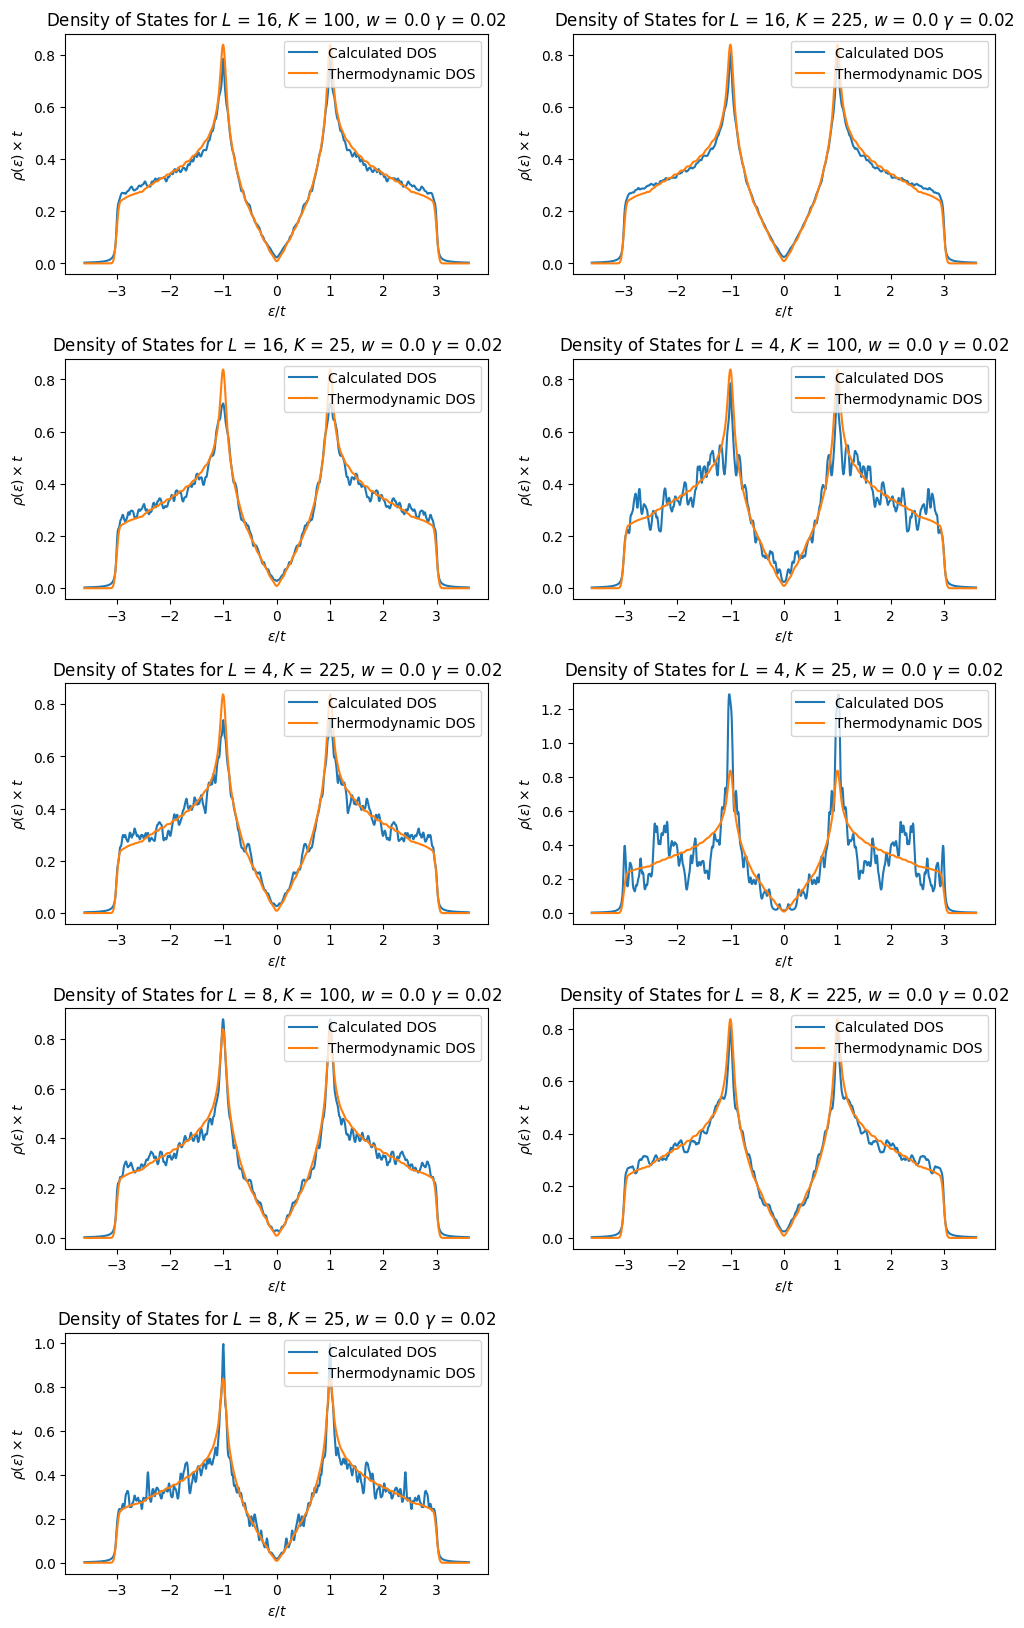

In [23]:
plotAll(dataArr, 2)

# Parallelization

NameError: name 'tt' is not defined

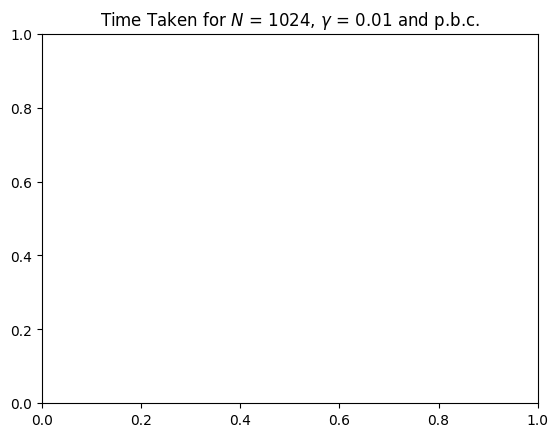

In [24]:
plt.title(f"Time Taken for $N$ = {1024}, $\\gamma$ = {0.01} and {'p.' if True else 'o.'}b.c.")
for tt, rr, index in zip(ttArr, rrArr, range(0, len(ttArr))):
    plt.plot(tt, rr[0] / rr, label=f"Trial {index+1}")

plt.plot(tt, tt, label="Expected Speedup")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.legend()